---
## Logistic Regression
#### Author: Zheyi Wang
---

### Contents
- Introduction
- Algorithm
    - Model
    - Cross-entropy
    - Gradient Descent in Solving Logistic Regression
- Illustration
- Pros and Cons
    - Pros
    - Cons
- Code and Application of Logistic Regression

### Introduction <a class="anchor" id="Introduction"></a>

In statistics, the [logistic regression model](https://en.wikipedia.org/wiki/Logistic_regression) is used to model the probability of a certain class or event existing. This can be extended to model several classes of events. Basicly it's an extension of linear regression to deal with classification tasks.

Logistic regression is used in various fields, including machine learning, most medical fields, and social sciences. 

### Algorithm <a class="anchor" id="Algorithm"></a>

#### Model <a class="anchor" id="Model"></a>
Consider a model with two predictors, $x_1$ and $x_2$, and one binary (Bernoulli) response variable $y$, with parameter $p=P(Y=1)$. We assume a linear relationship between the predictor variables and the log-odds (also called logit) of the event that $y=1$. This linear relationship can be written in the following mathematical form :

$$\log \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

where $\beta_i$ are parameters of the model.

We can recover the odds by exponentiating both sides of the above:

$$\frac{p}{1-p} = e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}$$

Isolating $p$ we have that the probability that $y=1$ is

$$p = \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}}{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2} + 1} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}} = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2)$$

where $\sigma(\cdot)$ is the sigmoid function.


#### Cross-entropy <a class="anchor" id="Cross-entropy"></a>
Cross-entropy loss is widely used in classification tasks. The [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) between two probability distributions $p$ and $q$ over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution $q$, rather than the true distribution $p$.

For discrete probability distributions, it's given by
$$
L(p, q) = -\sum_x {p(x)log (q(x))}
$$

And for binary classification, the form is
$$
L(p) = - (y log(p) + (1-y)log(1-p))
$$

#### Gradient Descent in Solving Logistic Regression <a class="anchor" id="Gradient"></a>

To use gradient descent to solve the solution of Logistic Regression, similar with linear regression, we take the derivative of loss function, and update the weights by the algorithm in the **Gradient Descent** section.

The loss function is the different part. Here the loss function for binary classification is given by
$$
L(\hat{y}, y) = - (y log(\sigma(\mathbf{x}\boldsymbol{\beta})) + (1-y)log(1-\sigma(\mathbf{x}\boldsymbol{\beta})))
$$

Thus the gradient is
$$
\frac{\partial L}{\partial \boldsymbol{\beta}} = [\sigma(\mathbf{x}\boldsymbol{\beta}-y)]\mathbf{x}
$$

And then follow the algorithm in the **Gradient Descent** section.

---

### Illustration

Basicly, rather than using a line to regress numeric values, logistic regression turns a linear regression to a *sigmoid* curve to classify different classes (we use value of y to differentiate classes)
 
<img src="images/logistic_regression_illustration.webp" alt="drawing" width="500"/>


### Pros and Cons of Logistic Regression
#### Pros
- Easier to implement, interpret, and very efficient to train.
- Running fast
- No assumptions about distributions of classes in feature space.
- Can use coefficients to interpret feature importance
- Can deal with missing data and no need of normalization.
- Easy to interprete feature importance

#### Cons
- Assume linear relations
- Cannot deal with the situation that number of features is larger than number of samples

--- 
### Code of Logistic Regression <a class="anchor" id="Code"></a>


#### import necessary packages
- [pandas](https://pandas.pydata.org/)
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [seaborn](https://seaborn.pydata.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

In [2]:
class gradient_descent_Logit_R():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]
    
    # cross entropy loss of one data
    def cross_entropy_loss(self, y, y_hat):
        return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

    # total cross entropy loss
    def loss(self):
        total_loss = sum(self.cross_entropy_loss(self.y[i], self.sigmoid(x@self.weights)) for i, x in enumerate(self.X))
        return total_loss

    # sigmoid function
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))

    # gradient of loss
    def gradient_L(self):
        sigmoids = np.array([self.sigmoid(x@self.weights) - self.y[i] for i, x in enumerate(self.X)])
        d_w = sigmoids @ self.X
        return d_w

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)
        for i in range(1, max_iter+1):
            dw = self.gradient_L()
            weights = weights - gamma * dw
            self.weights = weights
            self.weights_history.append(weights)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter or abs(L - self.loss_history[i-1]) <= self.eta:
                break
    
    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        labels = np.array([1, 0])
        y_hat = [self.sigmoid(x @ weights) for x in X]
        return [np.random.choice(labels, p = [y_hat_i, 1.0-y_hat_i]) for y_hat_i in y_hat]


---

### Applications on data sets <a class="anchor" id="Applications"></a>

* *wine* data

We test decistion tree on the *wine* data set from *sklearn.datasets*

Load *wine* data, and only pick first 2 types of wines.

In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)
X = X[y!=2]
y = y[y!=2]

Scale the input to avoid dividing by $0$.

In [4]:
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.452455,-0.294414,0.302478,-0.940375,1.768686,0.510421,0.775592,-0.462247,1.000229,0.892384,-0.112428,2.040025,0.782868
1,0.289066,-0.214558,-0.677197,-2.239324,0.006527,0.234327,0.367386,-0.646296,-0.878867,0.114374,-0.052918,0.941437,0.740152
2,0.243886,0.447106,1.113242,-0.054728,0.071792,0.510421,1.020516,-0.278198,1.967684,0.917082,-0.171937,0.455524,1.124598
3,1.610586,-0.020622,0.538951,-0.586117,0.854974,2.443085,1.360688,-0.830346,0.795575,2.226115,-1.183603,1.047071,1.964684
4,0.334246,0.709490,1.788880,0.653789,1.181300,0.510421,0.272138,0.550024,0.125798,0.077326,-0.112428,-0.051517,-0.156889


Split data set and train the model.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=24)
model = gradient_descent_Logit_R()
model.fit(X_train, y_train,gamma=0.01, max_iter=1000)

Plot the loss history.

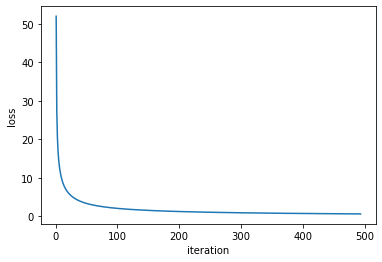

In [6]:
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Predict test data, and check the accuracy and confusion matrix.

In [7]:
y_pred = model.prediction(X_test, model.weights)
print(f'Logistic regression, accuracy score = {accuracy_score(y_test, y_pred)}')

Logistic regression, accuracy score = 1.0


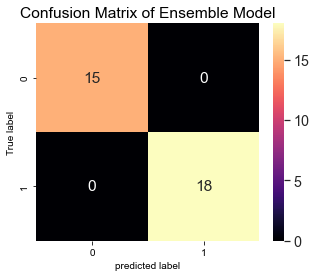

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

A really excellent prediction accuracy! All test data are correctly classified.